In [2]:

import geopandas as gpd
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


<AxesSubplot:>

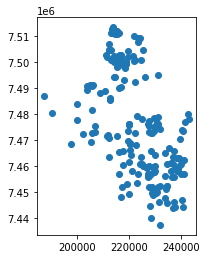

In [3]:
path = os.getcwd()+ '\Dados vetoriais\Pontos amostrais_Piracicaba\Dados_227pts_original_06_03_2021.shp'
pontos_pira = gpd.read_file(path)
pontos_pira.plot()

<AxesSubplot:>

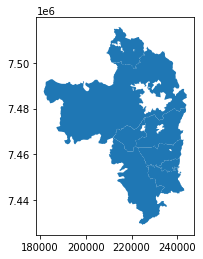

In [4]:
path2 = os.getcwd()+ '\Dados vetoriais\Piracicaba\Perimetro_Piracicaba.shp'
perimetro_pira = gpd.read_file(path2)
perimetro_pira.plot()

In [5]:
xizes = []
ypsolons = []

for geom in perimetro_pira.exterior:
    if(geom == None):
        continue
    xizes.extend(geom.coords.xy[0])
    ypsolons.extend(geom.coords.xy[1])

In [6]:
d = {'x': xizes, 'y': ypsolons}
df = pd.DataFrame(data = d)
df = df.drop_duplicates(subset='x', keep='last')
df = df.drop_duplicates(subset='y', keep='last')
df = df.reset_index()

In [7]:
y_f = interp1d(df['x'], df['y'], 'linear')
y = y_f(pontos_pira.geometry.x)

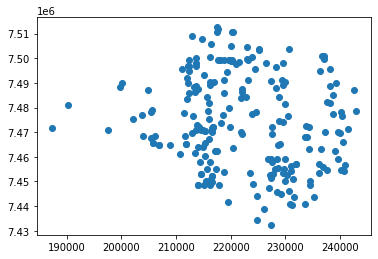

In [8]:
plt.scatter(pontos_pira.geometry.x,y)
plt.show()

In [11]:
data = {'x': pontos_pira.geometry.x, 'y': y}
df2 = pd.DataFrame(data = data)
gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.x, df2.y))

gdf = gdf.set_crs(epsg=31983)

path_out = os.getcwd() + '\Dados vetoriais\Piracicaba\municipios_filter.shp'
gdf.to_file(path_out)

C:\Users\diasc\AppData\Local\Temp\ipykernel_13752\3109102737.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  gdf.to_latex(path_out)


<AxesSubplot:>

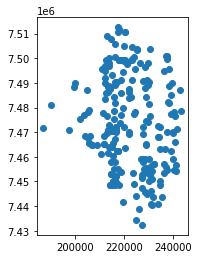

In [10]:
gpd.read_file(os.getcwd()+ '\Dados vetoriais\Piracicaba\municipios_filter.shp').plot()